In [11]:
import yfinance as yf
import os
import pandas as pd

In [12]:
btc_ticker = yf.Ticker("BTC-USD")

In [13]:
btc = btc_ticker.history(period="max")

In [14]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-22 00:00:00+00:00,63396.804688,63993.421875,62440.726562,63648.710938,20183348802,0.0,0.0
2024-09-23 00:00:00+00:00,63643.101562,64733.558594,62628.078125,63329.800781,31400285425,0.0,0.0
2024-09-24 00:00:00+00:00,63326.839844,64695.214844,62737.417969,64301.968750,29938335243,0.0,0.0


In [15]:
btc.index = btc.index.tz_localize(None)

In [16]:
del btc['Dividends']
del btc['Stock Splits']

In [17]:
btc.columns = [c.lower() for c in btc.columns]

<Axes: xlabel='Date'>

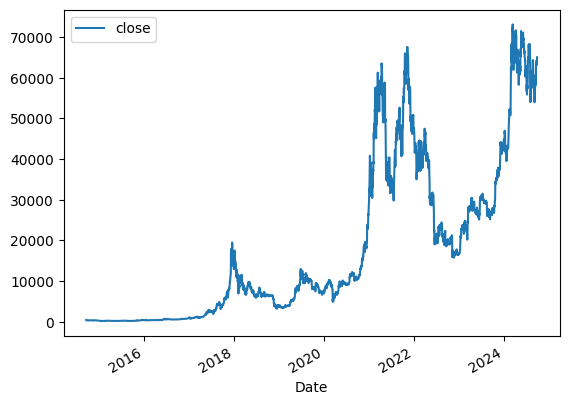

In [18]:
btc.plot.line(y='close', use_index=True)

In [19]:
wiki = pd.read_csv('wikipedia_edits.csv', index_col=0, parse_dates = True)

In [20]:
wiki

,edit_count,sentiment,neg_sentiment
2009-03-22,0.266667,-0.036702,0.050000
2009-03-23,0.000000,0.000000,0.000000
2009-03-24,0.000000,0.000000,0.000000
2009-03-25,0.000000,0.000000,0.000000
2009-03-26,0.000000,0.000000,0.000000
...,...,...,...
2024-09-22,0.066667,-0.066647,0.066667
2024-09-23,0.200000,-0.132948,0.133333
2024-09-24,0.200000,-0.132948,0.133333
2024-09-25,0.200000,-0.132948,0.133333


In [21]:
btc = btc.merge(wiki, left_index=True, right_index=True)

In [22]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,3.600000,-0.210959,0.513422
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,3.266667,-0.263395,0.541993
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,3.466667,-0.228847,0.508660
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,3.400000,-0.208723,0.497549
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,3.333333,-0.195046,0.486438
...,...,...,...,...,...,...,...,...
2024-09-21,63184.339844,63543.359375,62783.105469,63394.839844,14408616220,0.000000,0.000000,0.000000
2024-09-22,63396.804688,63993.421875,62440.726562,63648.710938,20183348802,0.066667,-0.066647,0.066667
2024-09-23,63643.101562,64733.558594,62628.078125,63329.800781,31400285425,0.200000,-0.132948,0.133333
2024-09-24,63326.839844,64695.214844,62737.417969,64301.968750,29938335243,0.200000,-0.132948,0.133333


In [23]:
btc['tomorrow'] = btc['close'].shift(-1)

In [24]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,3.600000,-0.210959,0.513422,424.440002
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,3.266667,-0.263395,0.541993,394.795990
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,3.466667,-0.228847,0.508660,408.903992
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,3.400000,-0.208723,0.497549,398.821014
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,3.333333,-0.195046,0.486438,402.152008
...,...,...,...,...,...,...,...,...,...
2024-09-21,63184.339844,63543.359375,62783.105469,63394.839844,14408616220,0.000000,0.000000,0.000000,63648.710938
2024-09-22,63396.804688,63993.421875,62440.726562,63648.710938,20183348802,0.066667,-0.066647,0.066667,63329.800781
2024-09-23,63643.101562,64733.558594,62628.078125,63329.800781,31400285425,0.200000,-0.132948,0.133333,64301.968750
2024-09-24,63326.839844,64695.214844,62737.417969,64301.968750,29938335243,0.200000,-0.132948,0.133333,63143.144531


In [25]:
btc['target'] = btc['tomorrow'] > btc['close'].astype(int)

In [26]:
btc['target'].value_counts()

,count
target,
True,1970
False,1692


In [27]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)
train = btc.iloc[:-200]
test = btc.iloc[-200:]
predictors = ['close', 'volume', 'open', 'high', 'low', 'edit_count', 'sentiment', 'neg_sentiment']
model.fit(train[predictors], train['target'])


RandomForestClassifier(min_samples_split=50, random_state=1)

In [28]:
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test['target'], preds)

0.49645390070921985

In [29]:
#Pretty Bad --> Let's Improve Upon It w/ backtesting

In [36]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name='predictions')
    combined = pd.concat([test['target'], preds], axis=1)
    return combined

In [37]:
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
        return pd.concat(all_predictions)

In [38]:
#RandomForestClassifier was good for a baseline model -- not accurate enough.
#XGBoost classifier --> slightly more accurate preds

In [39]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=200, learning_rate=0.05, random_state=1)
predictions = backtest(btc,model,predictors)

In [45]:
from sklearn.metrics import precision_score

precisionxg = precision_score(predictions['target'], predictions['predictions'])
print(f'We ended up with a precision value of {precisionxg*(100):2f}%.')

We ended up with a precision value of 54.198473%.


In [46]:
#Generate new predictors to improve accuracy!

In [49]:
def compute_rolling(btc):
  horizons = [2,7,60,365]
  new_predictors = ['close', 'sentiment', 'neg_sentiment']

  for horizon in horizons:
    rolling_averages = btc.rolling(horizon, min_periods=1).mean()
    ratio_coulumn = f'close_ratio_{horizon}'
    btc[ratio_coulumn] = btc['close'] / rolling_averages['close']
    edit_column = f'edit_count_ratio_{horizon}'
    btc[edit_column] = btc['edit_count'] / rolling_averages['edit_count']
    rolling = btc.rolling(horizon, closed='left', min_periods=1).mean()
    trend_column = f'trend_{horizon}'
    btc[trend_column] = rolling['target']
    new_predictors += [ratio_coulumn, trend_column, edit_column]
  return btc, new_predictors

In [51]:
btc, new_predictors = compute_rolling(btc.copy())

In [52]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target,...,trend_2,close_ratio_7,edit_count_ratio_7,trend_7,close_ratio_60,edit_count_ratio_60,trend_60,close_ratio_365,edit_count_ratio_365,trend_365
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,3.600000,-0.210959,0.513422,424.440002,False,...,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,3.266667,-0.263395,0.541993,394.795990,False,...,0.0,0.962696,0.951456,0.000000,0.962696,0.951456,0.000000,0.962696,0.951456,0.000000
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,3.466667,-0.228847,0.508660,408.903992,True,...,0.0,0.927789,1.006452,0.000000,0.927789,1.006452,0.000000,0.927789,1.006452,0.000000
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,3.400000,-0.208723,0.497549,398.821014,False,...,0.5,0.970419,0.990291,0.333333,0.970419,0.990291,0.333333,0.970419,0.990291,0.333333
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,3.333333,-0.195046,0.486438,402.152008,True,...,0.5,0.956729,0.976562,0.250000,0.956729,0.976562,0.250000,0.956729,0.976562,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-21,63184.339844,63543.359375,62783.105469,63394.839844,14408616220,0.000000,0.000000,0.000000,63648.710938,True,...,1.0,1.034748,NaN,0.714286,1.050501,0.000000,0.500000,1.190329,0.000000,0.528767
2024-09-22,63396.804688,63993.421875,62440.726562,63648.710938,20183348802,0.066667,-0.066647,0.066667,63329.800781,False,...,1.0,1.028185,7.000000,0.857143,1.055210,0.269058,0.516667,1.192821,0.035697,0.528767
2024-09-23,63643.101562,64733.558594,62628.078125,63329.800781,31400285425,0.200000,-0.132948,0.133333,64301.968750,True,...,0.5,1.011047,5.250000,0.857143,1.050633,0.807175,0.500000,1.184590,0.107248,0.528767
2024-09-24,63326.839844,64695.214844,62737.417969,64301.968750,29938335243,0.200000,-0.132948,0.133333,63143.144531,False,...,0.5,1.017302,3.000000,0.857143,1.067827,0.821918,0.500000,1.200437,0.107395,0.528767


In [53]:
predictions = backtest(btc,model,new_predictors)

In [56]:
precisionxg2 = precision_score(predictions['target'], predictions['predictions'])
print(f'We ended up with a final precision value of {precisionxg2*(100):2f}%.')

We ended up with a final precision value of 57.352941%.
